In [ ]:
#CNN Model For Cut Detection

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from numpy import asarray
import pandas as pd
import numpy as np
from PIL import Image
import os, os.path
import glob
from tensorflow.keras.optimizers.legacy import Adam

In [4]:
# load data 299
imgs_299= []
path = "./299_imgs/"
lof = sorted(os.listdir(path))
for file in lof:
    print(file)
    img = Image.open(os.path.join(path,file))
#     imgs.append(img)
    nparray_img = asarray(img)
    imgs_299.append(nparray_img)

0_0.png
0_1.png
0_10.png
0_100.png
0_101.png
0_102.png
0_103.png
0_104.png
0_105.png
0_106.png
0_107.png
0_108.png
0_109.png
0_11.png
0_110.png
0_111.png
0_112.png
0_113.png
0_114.png
0_115.png
0_116.png
0_117.png
0_118.png
0_119.png
0_12.png
0_120.png
0_121.png
0_122.png
0_123.png
0_124.png
0_125.png
0_126.png
0_127.png
0_128.png
0_129.png
0_13.png
0_130.png
0_131.png
0_132.png
0_133.png
0_134.png
0_135.png
0_136.png
0_137.png
0_138.png
0_139.png
0_14.png
0_140.png
0_141.png
0_142.png
0_143.png
0_144.png
0_145.png
0_146.png
0_147.png
0_148.png
0_149.png
0_15.png
0_150.png
0_151.png
0_152.png
0_153.png
0_154.png
0_155.png
0_156.png
0_157.png
0_158.png
0_159.png
0_16.png
0_160.png
0_161.png
0_162.png
0_163.png
0_164.png
0_165.png
0_166.png
0_167.png
0_168.png
0_169.png
0_17.png
0_170.png
0_171.png
0_172.png
0_173.png
0_174.png
0_175.png
0_176.png
0_177.png
0_178.png
0_179.png
0_18.png
0_180.png
0_181.png
0_182.png
0_183.png
0_184.png
0_185.png
0_186.png
0_187.png
0_188.png
0_189.png
0_1

11_37.png
11_38.png
11_39.png
11_4.png
11_40.png
11_41.png
11_42.png
11_43.png
11_44.png
11_45.png
11_46.png
11_47.png
11_48.png
11_49.png
11_5.png
11_50.png
11_51.png
11_52.png
11_53.png
11_54.png
11_55.png
11_56.png
11_57.png
11_58.png
11_59.png
11_6.png
11_60.png
11_61.png
11_62.png
11_63.png
11_64.png
11_65.png
11_66.png
11_67.png
11_68.png
11_69.png
11_7.png
11_70.png
11_71.png
11_72.png
11_73.png
11_74.png
11_75.png
11_76.png
11_77.png
11_78.png
11_79.png
11_8.png
11_80.png
11_81.png
11_82.png
11_83.png
11_84.png
11_85.png
11_86.png
11_87.png
11_88.png
11_89.png
11_9.png
11_90.png
11_91.png
11_92.png
11_93.png
11_94.png
11_95.png
11_96.png
11_97.png
11_98.png
11_99.png
1_0.png
1_1.png
1_10.png
1_100.png
1_101.png
1_102.png
1_103.png
1_104.png
1_105.png
1_106.png
1_107.png
1_108.png
1_109.png
1_11.png
1_110.png
1_111.png
1_112.png
1_113.png
1_114.png
1_115.png
1_116.png
1_117.png
1_118.png
1_119.png
1_12.png
1_120.png
1_121.png
1_122.png
1_123.png
1_124.png
1_125.png
1_126.png
1_1

3_277.png
3_278.png
3_279.png
3_28.png
3_280.png
3_281.png
3_282.png
3_283.png
3_284.png
3_285.png
3_286.png
3_287.png
3_288.png
3_289.png
3_29.png
3_290.png
3_291.png
3_292.png
3_293.png
3_294.png
3_295.png
3_296.png
3_297.png
3_298.png
3_3.png
3_30.png
3_31.png
3_32.png
3_33.png
3_34.png
3_35.png
3_36.png
3_37.png
3_38.png
3_39.png
3_4.png
3_40.png
3_41.png
3_42.png
3_43.png
3_44.png
3_45.png
3_46.png
3_47.png
3_48.png
3_49.png
3_5.png
3_50.png
3_51.png
3_52.png
3_53.png
3_54.png
3_55.png
3_56.png
3_57.png
3_58.png
3_59.png
3_6.png
3_60.png
3_61.png
3_62.png
3_63.png
3_64.png
3_65.png
3_66.png
3_67.png
3_68.png
3_69.png
3_7.png
3_70.png
3_71.png
3_72.png
3_73.png
3_74.png
3_75.png
3_76.png
3_77.png
3_78.png
3_79.png
3_8.png
3_80.png
3_81.png
3_82.png
3_83.png
3_84.png
3_85.png
3_86.png
3_87.png
3_88.png
3_89.png
3_9.png
3_90.png
3_91.png
3_92.png
3_93.png
3_94.png
3_95.png
3_96.png
3_97.png
3_98.png
3_99.png
4_0.png
4_1.png
4_10.png
4_100.png
4_101.png
4_102.png
4_103.png
4_104.png
4

6_255.png
6_256.png
6_257.png
6_258.png
6_259.png
6_26.png
6_260.png
6_261.png
6_262.png
6_263.png
6_264.png
6_265.png
6_266.png
6_267.png
6_268.png
6_269.png
6_27.png
6_270.png
6_271.png
6_272.png
6_273.png
6_274.png
6_275.png
6_276.png
6_277.png
6_278.png
6_279.png
6_28.png
6_280.png
6_281.png
6_282.png
6_283.png
6_284.png
6_285.png
6_286.png
6_287.png
6_288.png
6_289.png
6_29.png
6_290.png
6_291.png
6_292.png
6_293.png
6_294.png
6_295.png
6_296.png
6_297.png
6_298.png
6_3.png
6_30.png
6_31.png
6_32.png
6_33.png
6_34.png
6_35.png
6_36.png
6_37.png
6_38.png
6_39.png
6_4.png
6_40.png
6_41.png
6_42.png
6_43.png
6_44.png
6_45.png
6_46.png
6_47.png
6_48.png
6_49.png
6_5.png
6_50.png
6_51.png
6_52.png
6_53.png
6_54.png
6_55.png
6_56.png
6_57.png
6_58.png
6_59.png
6_6.png
6_60.png
6_61.png
6_62.png
6_63.png
6_64.png
6_65.png
6_66.png
6_67.png
6_68.png
6_69.png
6_7.png
6_70.png
6_71.png
6_72.png
6_73.png
6_74.png
6_75.png
6_76.png
6_77.png
6_78.png
6_79.png
6_8.png
6_80.png
6_81.png
6_82.png

9_219.png
9_22.png
9_220.png
9_221.png
9_222.png
9_223.png
9_224.png
9_225.png
9_226.png
9_227.png
9_228.png
9_229.png
9_23.png
9_230.png
9_231.png
9_232.png
9_233.png
9_234.png
9_235.png
9_236.png
9_237.png
9_238.png
9_239.png
9_24.png
9_240.png
9_241.png
9_242.png
9_243.png
9_244.png
9_245.png
9_246.png
9_247.png
9_248.png
9_249.png
9_25.png
9_250.png
9_251.png
9_252.png
9_253.png
9_254.png
9_255.png
9_256.png
9_257.png
9_258.png
9_259.png
9_26.png
9_260.png
9_261.png
9_262.png
9_263.png
9_264.png
9_265.png
9_266.png
9_267.png
9_268.png
9_269.png
9_27.png
9_270.png
9_271.png
9_272.png
9_273.png
9_274.png
9_275.png
9_276.png
9_277.png
9_278.png
9_279.png
9_28.png
9_280.png
9_281.png
9_282.png
9_283.png
9_284.png
9_285.png
9_286.png
9_287.png
9_288.png
9_289.png
9_29.png
9_290.png
9_291.png
9_292.png
9_293.png
9_294.png
9_295.png
9_296.png
9_297.png
9_298.png
9_3.png
9_30.png
9_31.png
9_32.png
9_33.png
9_34.png
9_35.png
9_36.png
9_37.png
9_38.png
9_39.png
9_4.png
9_40.png
9_41.png
9_42

In [5]:
#load verif
imgs_veri_299 = []
path = "./299_8_images/"
lof = sorted(os.listdir(path))
for file in lof:
#     print(file)
    img = Image.open(os.path.join(path,file))
#     imgs_veri.append(img)
    nparray_img = asarray(img)
    imgs_veri_299.append(nparray_img)

In [23]:
# load gt 299
gts_299 = []
path = "./299_gts/"
lof = sorted(os.listdir(path))
for file in lof:
#     print(file)
    df = pd.read_csv(path + file)
    gt_temp = df['truth'].tolist()
    print(gt_temp[0])
    gts_299.append(gt_temp[0])
#     print(df['gt'])

0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0


In [7]:
# load  veri gt
veri_gts_299 = []
path = "./299_8_gts/"
lof = sorted(os.listdir(path))
for file in lof:
#     print(file)
    df = pd.read_csv(path + file)
    gt_temp = df['truth'].tolist()
#     print(gt_temp)
    veri_gts_299.append(gt_temp[0])

In [13]:
type(np.array(imgs_299))

numpy.ndarray

In [24]:
# converting lists generated to numpy.ndarray
# and also devide by 255 so that all color value is between 0 and 1

train_images_299 = np.array(imgs_299)/255
train_gts_299 = np.array(gts_299)/255
veri_images_299 = np.array(imgs_veri_299)/255
veri_gts_299 = np.array(veri_gts_299)/255

In [15]:
# import keras from keras.datasets 
# import mnist from keras.models 
# import Sequential
import keras
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import backend as K


In [25]:
model = models.Sequential()

In [26]:
input_shape = (231,349,4)

In [27]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(288,432,4)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 32)      1184      
                                                                 
 conv2d_1 (Conv2D)           (None, 284, 428, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 142, 214, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 140, 212, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 70, 106, 128)     0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 70, 106, 128)      0

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [129]:
veri_images_299.shape

(11, 288, 432, 4)

In [133]:
veri_gts_299.shape

(11,)

In [29]:
model.fit(train_images_299, train_gts_299, batch_size=70, epochs=1, verbose=1, validation_data=(veri_images_299, veri_gts_299),shuffle=True)

/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


52/52 [==============================] - 1572s 30s/step - loss: 0.0000e+00 - accuracy: 0.9225 - val_loss: 0.0000e+00 - val_accuracy: 0.9820


In [31]:
model.save('/Users/friday/Documents/cnn_cut_detection/cut_sound_detection_with_cnn')

INFO:tensorflow:Assets written to: /Users/friday/Documents/cnn_cut_detection/cut_sound_detection_with_cnn/assets


INFO:tensorflow:Assets written to: /Users/friday/Documents/cnn_cut_detection/cut_sound_detection_with_cnn/assets


In [1]:
eval_299 = model.evaluate(veri_images_299, veri_gts_299,batch_size=128)

NameError: name 'model' is not defined

In [24]:
result = model.predict(veri_images)

1/1 [==============================] - 1s 1s/step


In [40]:
reshape_test = train_gts[0].reshape([299,])

In [41]:
reshape_test.shape

(299,)

In [457]:
train_gts[0].shape

(299,)

In [428]:
train_gts[0][0]

0

In [419]:
reshape_test.shape

(1, 299)

In [435]:
veri_images.shape, veri_gts.shape

((11, 231, 349, 4), (11, 299))

In [ ]:
cnn_model_1.summary()

In [26]:
#initialize cnn model using keras
cnn_model_2 = models.Sequential()
cnn_model_2.add(layers.Dense(100,activation = 'sigmoid',input_shape=(100,)))
cnn_model_2.add(layers.Dense(25,activation = 'sigmoid'))

In [27]:
cnn_model_3 = models.Sequential()
cnn_model_3.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(231,349,4)))
cnn_model_3.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
cnn_model_3.add(layers.Flatten())
cnn_model_3.add(layers.Dense(299, activation='sigmoid'))

In [28]:
cnn_model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 229, 347, 64)      2368      
                                                                 
 conv2d_7 (Conv2D)           (None, 227, 345, 32)      18464     
                                                                 
 flatten_3 (Flatten)         (None, 2506080)           0         
                                                                 
 dense_5 (Dense)             (None, 299)               749318219 
                                                                 
Total params: 749,339,051
Trainable params: 749,339,051
Non-trainable params: 0
_________________________________________________________________


In [448]:
cnn_model_2.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 100)               10100     
                                                                 
 dense_76 (Dense)            (None, 25)                2525      
                                                                 
Total params: 12,625
Trainable params: 12,625
Non-trainable params: 0
_________________________________________________________________


In [248]:
extractor = keras.Model(inputs=cnn_model_1.inputs,
                        outputs=[layer.output for layer in cnn_model_1.layers])
features = extractor(train_images)

In [251]:
features[6]

<tf.Tensor: shape=(11, 299), dtype=float32, numpy=
array([[-36.26174  ,  29.355246 ,  -5.8997   , ..., -42.45078  ,
        -51.534485 ,   8.669948 ],
       [-38.01546  ,  29.612547 ,  -5.988986 , ..., -42.634846 ,
        -51.15147  ,  10.306754 ],
       [-37.686928 ,  29.658094 ,  -4.2506866, ..., -44.19187  ,
        -49.717834 ,  11.743917 ],
       ...,
       [-41.32722  ,  27.831429 ,  -6.0009913, ..., -41.185516 ,
        -53.339283 ,   9.461453 ],
       [-40.131794 ,  28.990587 ,  -4.1034   , ..., -44.994896 ,
        -51.26645  ,  12.475022 ],
       [-38.661858 ,  28.894228 ,  -2.6120644, ..., -44.738033 ,
        -49.252853 ,  13.237906 ]], dtype=float32)>

In [246]:
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
cnn_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
cnn_model_3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [1]:
history = cnn_model_1.fit(train_images, train_gts, epochs=10, 
                    validation_data=(veri_images, veri_gts))

NameError: name 'cnn_model_1' is not defined

In [38]:
history = cnn_model_3.fit(train_images, train_gts, epochs=10, 
                    validation_data=(veri_images, veri_gts))

Epoch 1/10


/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "/Users/friday/opt/anaconda3/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/friday/opt/anaconda3/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
      app.start()
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 612, in start
      self.io_loop.start()
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/friday/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/friday/opt/anaconda3/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/friday/opt/anaconda3/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/ioloop.py", line 741, in _run_callback
      ret = callback()
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 365, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 543, in execute_request
      self.do_execute(
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/tornado/gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2894, in run_cell
      result = self._run_cell(
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3165, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3357, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-38-4c167033bbeb>", line 1, in <module>
      history = cnn_model_3.fit(train_images, train_gts, epochs=10,
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/losses.py", line 2078, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "/Users/friday/opt/anaconda3/lib/python3.8/site-packages/keras/backend.py", line 5660, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [32,299] and labels shape [9568]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1307]

In [317]:
sum(cnn_model_1.predict(train_images)[3])

1/1 [==============================] - 0s 212ms/step


array([1., 0.], dtype=float32)

In [343]:
predict_result = cnn_model_1.predict(veri_images)

1/1 [==============================] - 0s 170ms/step


In [345]:
sum(predict_result[0])

array([260.,  40.], dtype=float32)

In [267]:
train_images[0][1]

array([[255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       ...,
       [255, 255, 255,   0],
       [255, 255, 255,   0],
       [255, 255, 255,   0]], dtype=uint8)

In [152]:
train_images.shape

(11, 231, 349, 4)

In [225]:
train_gts_fk=[1,1,1,1,0,1,1,1,1,0,2]
train_gts_fk = np.asarray(train_gts_fk)

In [122]:
model_2 = models.Sequential()

In [ ]:
cnn_model_1.add(layers.Dense(64, activation='relu'))
cnn_model_1.add(layers.Dense(299))

In [116]:
type(train_images[0][0])

numpy.ndarray

In [ ]:
train_labels = 

In [121]:
tf.__version__

'2.10.0'

In [362]:
veri_images[0].size

322476

In [381]:
img_Veri = Image.open("./verify_gt_1.png")
nparray_img_Veri = asarray(img_Veri)
t_list = []
t_list.append(nparray_img_Veri)
t_list.append(nparray_img_Veri)

In [382]:
veri_gt_1 = np.array(t_list)

In [383]:
veri_gt_1.shape

(2, 231, 349, 4)

In [379]:
t_list = []
t_list.append(veri_gt_1)
t_list.append(veri_gt_1)

In [399]:
predict_result_veri = cnn_model_1.predict(veri_gt_1)

1/1 [==============================] - 0s 106ms/step


In [400]:
veri_gt_1[0].size

322476

In [401]:
sum(predict_result_veri[0])

array([260.,  40.], dtype=float32)

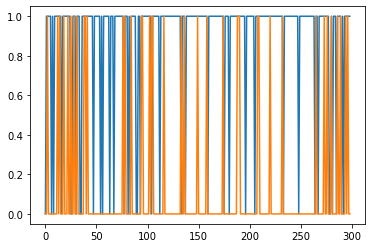

In [402]:
plt.plot(predict_result_veri[0])

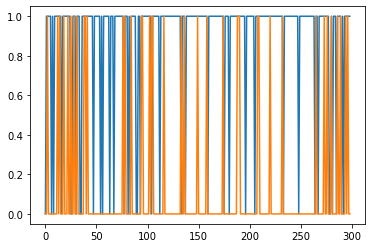

In [392]:
plt.plot(predict_result[10])